In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
PATH = "./Data/Development dataset for Training"
file = os.path.join(PATH, 'task1.txt')

In [3]:
class Series:
    def __init__(self):
        self.n = 0
        self.series = {'1D':None, '2D':None, '3D':None}
        self.tmax = {'1D':0, '2D':0, '3D':0}
        self.labels = {'1D':None, '2D':None, '3D':None}
        self.task = '0'
    
    def __len__(self):
        return self.n
        
        
    def read(self, PATH):
        self.task = PATH[-5]
        series = pd.read_csv(PATH, header=None, sep="\n")
        series = series[0].str.split(';')
        dim_idx = series.map(lambda x: int(float(x[0])))
        labels = PATH[:-9]+'ref'+self.task+'.txt'
        labels = pd.read_csv(os.path.join(labels), header=None, sep=';').drop(0, axis=1)
        
        self.n = len(series)
        for i, dim in enumerate(['1D', '2D', '3D']):
            self.labels[dim] = labels[dim_idx == i+1]
            self.tmax[dim] = max(series[dim_idx == i+1].map(lambda x:len(x[1:])))
            if i == 0:
                self.series[dim] = series[dim_idx == i+1].map(lambda x:np.array(x[1:], dtype='float64'))
            else:
                self.series[dim] = series[dim_idx == i+1].map(lambda x:np.array(x[1:], dtype='float64').reshape(-1, i+1, order='F'))
    
    def get(self, idx, dim):
        if dim == 1:
            serie = np.zeros((len(idx), self.tmax['1D']), dtype='float64')
            for i, j in enumerate(self.series['1D'].iloc[idx]):
                serie[i, :len(j)] += j    
        elif dim == 2:
            serie = np.zeros((len(idx), self.tmax['2D']//2, 2), dtype='float64')
            for i, j in enumerate(self.series['2D'].iloc[idx]):
                serie[i, :j.shape[0], :] += j
        elif dim == 3:
            serie = np.zeros((len(idx), self.tmax['3D']//3, 3), dtype='float64')
            for i, j in enumerate(self.series['3D'].iloc[idx]):
                serie[i, :j.shape[0], :] += j
        else:
            print("Wrong dim number")
            
        dim = list(self.labels.keys())[dim-1]
        if self.task == '1':
            label = self.labels[dim].iloc[idx].values.reshape(-1)
        elif self.task == '2':
            label = self.labels[dim].iloc[idx].astype(int).values.reshape(-1)
        elif self.task == '3':
            label = self.labels[dim].iloc[idx].values
            
        return serie, label

In [4]:
series = Series()
series.read(file)

0.9


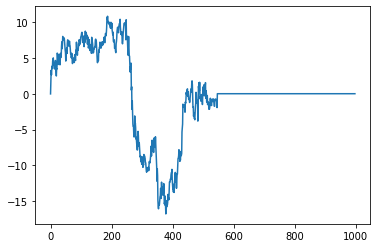

In [5]:
serie, label = series.get([0,1,2],1)
plt.plot(range(series.tmax['1D']), serie[0,:])
print(label[0])

0.95


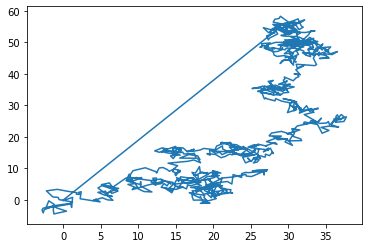

In [6]:
serie, label = series.get([0,1,2],2)
plt.plot(serie[0,:,0], serie[0,:,1])
print(label[0])

0.2


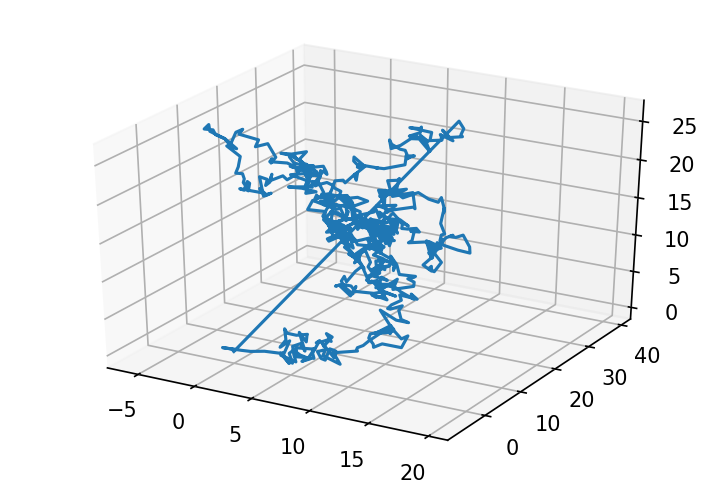

In [8]:
serie, label = series.get([0,1,2],3)
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=serie[2,:,0], ys=serie[2,:,1], zs=serie[2,:,2])
print(label[0])

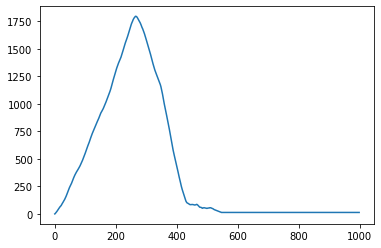

In [11]:
serie, label = series.get([0], 1)
serie = serie.cumsum(axis=1)[0]
plt.plot(range(len(serie)), serie)

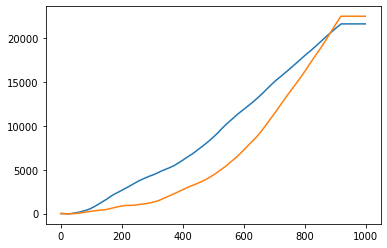

In [14]:
serie, label = series.get([0], 2)
serie = serie.cumsum(axis=1)[0]
plt.plot(range(serie.shape[0]), serie[:,0])
plt.plot(range(serie.shape[0]), serie[:,1])

In [99]:
series.series['2D'].iloc[0].shape

(919, 2)

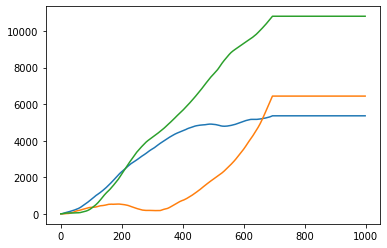

In [15]:
serie, label = series.get([2], 3)
serie = serie.cumsum(axis=1)[0]
plt.plot(range(serie.shape[0]), serie[:,0])
plt.plot(range(serie.shape[0]), serie[:,1])
plt.plot(range(serie.shape[0]), serie[:,2])